<a href="https://colab.research.google.com/github/Nerebo/5-Periodo/blob/main/AnaliseIDHBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cidades_do_brasil.csv")

df = df[df['Valor Vazio']!=1]

df = df.rename(columns={'IBGE_1-4': 'IBGE_1_4'})

estados_regiao = {
    "AC": "Norte", "AL": "Nordeste", "AP": "Norte", "AM": "Norte", "BA": "Nordeste",
    "CE": "Nordeste", "DF": "Centro_Oeste", "ES": "Sudeste", "GO": "Centro_Oeste",
    "MA": "Nordeste", "MT": "Centro_Oeste", "MS": "Centro_Oeste", "MG": "Sudeste",
    "PA": "Norte", "PB": "Nordeste", "PR": "Sul", "PE": "Nordeste", "PI": "Nordeste",
    "RJ": "Sudeste", "RN": "Nordeste", "RS": "Sul", "RO": "Norte", "RR": "Norte",
    "SC": "Sul", "SP": "Sudeste", "SE": "Nordeste", "TO": "Norte"
}

df['Região'] = df["Estado"].map(estados_regiao)

df

,Município,Estado,IBGE_1_4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio,Região
9,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,0,Sudeste
10,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0,0,Sudeste
11,Rio De Janeiro,RJ,235380.0,0.799,0.840,0.719,50690.82,6744.0,0,Sudeste
12,Brasília,DF,143641.0,0.820,0.863,0.742,79099.77,3043.0,0,Centro_Oeste
13,Porto Alegre,RS,58369.0,0.805,0.867,0.702,49577.53,2217.0,0,Sul
...,...,...,...,...,...,...,...,...,...,...
5571,Floresta Do Piauí,PI,48.0,0.540,0.530,0.391,7638.73,1.0,0,Nordeste
5572,João Dias,RN,58.0,0.530,0.495,0.390,6994.26,1.0,0,Nordeste
5573,Araguainha,MT,55.0,0.701,0.650,0.627,19395.16,1.0,0,Centro_Oeste
5574,Lagoinha Do Piauí,PI,100.0,0.597,0.561,0.488,6508.49,0.0,0,Nordeste


In [111]:
df1 = df.copy()

df1 = df1.sort_values(by='IDHM')

q1 = df1['IDHM'].quantile(0.25)

print(q1)

0.599


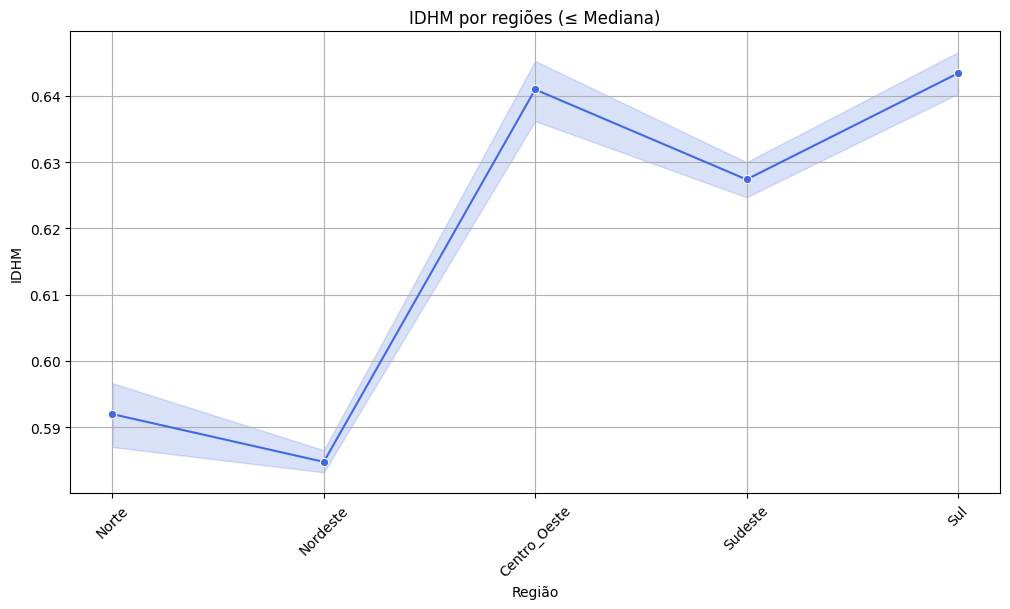

In [112]:
df2 = df.copy()

df2 = df2.sort_values(by='IDHM')

q2 = df2['IDHM'].quantile(0.5)

df2 = df2[df2['IDHM'] <= q2]

plt.figure(figsize=(12, 6))
sns.lineplot(x=df2["Região"], y=df2["IDHM"], marker="o", linestyle="-", color="royalblue")

# Configurações do gráfico
plt.xticks(rotation=45)  # Rotaciona os nomes dos estados para melhor leitura
plt.xlabel("Região")
plt.ylabel("IDHM")
plt.title("IDHM por regiões (≤ Mediana)")
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [113]:
def calc_idh(nome, idh):
    if idh >= 0.800:
        print(nome, "- Muito Alto")
    elif idh >= 0.700:
        print(nome, "- Alto")
    elif idh >= 0.550:
        print(nome, "- Médio")
    else:
        print(nome, "- Baixo")

df3 = df.copy()

idh_por_regiao = df3.groupby('Região')['IDHM'].mean()

calc_idh('Nordeste',idh_por_regiao.Nordeste)
calc_idh('Norte',idh_por_regiao.Norte)
calc_idh('Centro-Oeste',idh_por_regiao.Centro_Oeste)
calc_idh('Sul',idh_por_regiao.Sul)
calc_idh('Sudeste',idh_por_regiao.Sudeste)
calc_idh('Brasil', df3['IDHM'].mean())

Nordeste - Médio
Norte - Médio
Centro-Oeste - Médio
Sul - Alto
Sudeste - Médio
Brasil - Médio


<ipython-input-114-f95477257025>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Região', y='IDHM_Educacao', data=df4, palette="Set2")


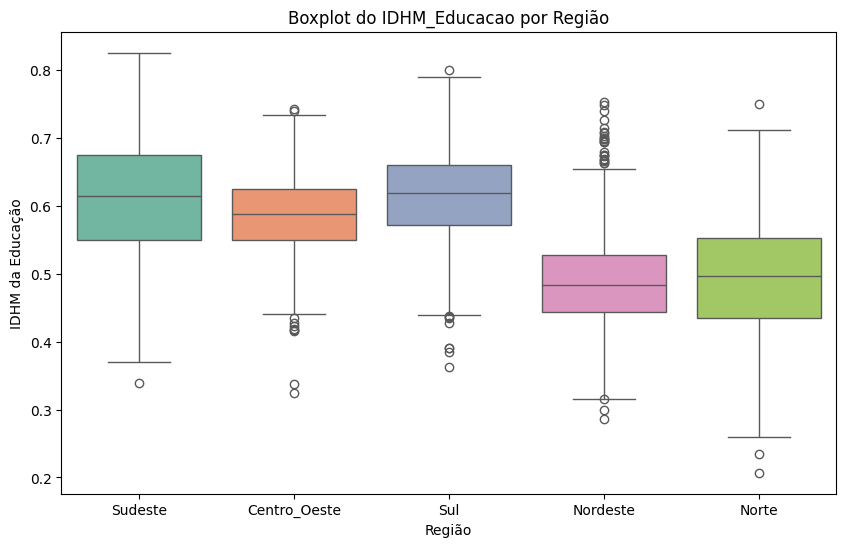

In [114]:
df4 = df.copy()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Região', y='IDHM_Educacao', data=df4, palette="Set2")

# Ajustar título e labels
plt.title("Boxplot do IDHM_Educacao por Região")
plt.xlabel("Região")
plt.ylabel("IDHM da Educação")

# Mostrar o gráfico
plt.show()

In [147]:
df5 = df.copy()

df5 = df5.sort_values('IBGE_1_4')

q4 = df5['IBGE_1_4'].quantile(0.75)

df5 = df5[df5['Região'] == 'Nordeste']

df5 = df5[df5['IBGE_1_4'] >= q4]

df5

,Município,Estado,IBGE_1_4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio,Região
2033,São José Da Tapera,AL,952.0,0.527,0.508,0.409,6988.02,34.0,0,Nordeste
2454,São Raimundo Das Mangabeiras,MA,952.0,0.610,0.583,0.521,21280.95,3.0,0,Nordeste
3372,Vicência,PE,953.0,0.605,0.551,0.534,12194.26,21.0,0,Nordeste
1253,Iguaí,BA,954.0,0.552,0.559,0.382,7028.27,20.0,0,Nordeste
2428,Madre De Deus,BA,958.0,0.708,0.670,0.667,22017.50,8.0,0,Nordeste
...,...,...,...,...,...,...,...,...,...,...
77,Maceió,AL,52009.0,0.721,0.739,0.635,20853.41,709.0,0,Nordeste
16,Recife,PE,54720.0,0.772,0.798,0.698,30477.73,1572.0,0,Nordeste
71,São Luís,MA,54955.0,0.768,0.741,0.752,26154.25,582.0,0,Nordeste
19,Salvador,BA,91470.0,0.759,0.772,0.679,20796.62,2409.0,0,Nordeste


In [157]:
df6 = df.copy()

df6 = df6.sort_values('COMP_P')

q6 = df6['COMP_P'].quantile(0.25)

df6 = df6[df6['COMP_P'] <= q6]

df6

,Município,Estado,IBGE_1_4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio,Região
5570,Novo Santo Antônio,PI,43.0,0.528,0.536,0.392,7222.72,0.0,0,Nordeste
4994,Granjeiro,CE,79.0,0.585,0.533,0.526,7134.70,0.0,0,Nordeste
5022,São João De Iracema,SP,78.0,0.748,0.682,0.738,16045.26,0.0,0,Sudeste
5020,Domingos Mourão,PI,54.0,0.550,0.547,0.403,7090.10,0.0,0,Nordeste
5018,Guaribas,PI,91.0,0.508,0.483,0.381,6783.90,0.0,0,Nordeste
...,...,...,...,...,...,...,...,...,...,...
5011,São Gonçalo Do Piauí,PI,223.0,0.616,0.538,0.588,6297.33,2.0,0,Nordeste
5013,Marinópolis,SP,62.0,0.731,0.681,0.694,14394.98,2.0,0,Sudeste
5552,Porto Vera Cruz,RS,18.0,0.690,0.661,0.600,18150.69,2.0,0,Sul
5553,Paulistânia,SP,50.0,0.718,0.683,0.663,16802.89,2.0,0,Sudeste


In [159]:
df7 = df.copy()

df7 = df7.sort_values('COMP_P')

df7 = df7[df7['COMP_P'] < 1]

df7 # Priorizar as cidades onde o Comp_P é 0, isso significa que levaremos iniciativas incentivando a educação para cidades onde ela não existe

,Município,Estado,IBGE_1_4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Valor Vazio,Região
5570,Novo Santo Antônio,PI,43.0,0.528,0.536,0.392,7222.72,0.0,0,Nordeste
4994,Granjeiro,CE,79.0,0.585,0.533,0.526,7134.70,0.0,0,Nordeste
5022,São João De Iracema,SP,78.0,0.748,0.682,0.738,16045.26,0.0,0,Sudeste
5020,Domingos Mourão,PI,54.0,0.550,0.547,0.403,7090.10,0.0,0,Nordeste
5018,Guaribas,PI,91.0,0.508,0.483,0.381,6783.90,0.0,0,Nordeste
...,...,...,...,...,...,...,...,...,...,...
5542,Carrasco Bonito,TO,190.0,0.594,0.543,0.531,8606.10,0.0,0,Norte
5545,Nova Iorque,MA,208.0,0.584,0.558,0.489,7119.49,0.0,0,Nordeste
5521,Santa Bárbara Do Monte Verde,MG,79.0,0.606,0.617,0.438,13033.50,0.0,0,Sudeste
5523,Pedrão,BA,94.0,0.588,0.534,0.490,5293.77,0.0,0,Nordeste
